<a href="https://colab.research.google.com/github/ekingit/DeepForecast/blob/main/2_1_Hyperparameter_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/Colab\ Notebooks/weather_forecast/Data/data.py /content/data.py
!cp /content/gdrive/MyDrive/Colab\ Notebooks/weather_forecast/models.py /content/models.py
!cp /content/gdrive/MyDrive/Colab\ Notebooks/weather_forecast/train.py /content/train.py
from data import Sine_Data, Weather_Data
from models import RNN_periodic
from train import train_test_RNN

In [ ]:
data_loc = '/content/gdrive/MyDrive/Colab Notebooks/weather_forecast/Data/weather_prediction_dataset.csv'
data_column = 'BASEL_temp_max'
nat_data = Weather_Data(data_loc,data_column)
synt_data = Sine_Data(2/365.25,3654,3/2)
X_sine = synt_data.x.unsqueeze(-1)
X_raw = nat_data.tens

(torch.Size([3654, 1]), torch.Size([3654, 1]))

In [ ]:
#sanity check
loss = nn.MSELoss()
loss(X_sine, X_raw)

tensor(0.3161)

In [ ]:
#create an empty .csv to save the results
columns = ['model', 'hidden_size', 'num_layers', 'run_time', 'device','best_epoch', 'num_epoch',
           'test_loss','val_loss','train_loss']
df = pd.DataFrame(columns=columns)
res_loc = '/content/gdrive/MyDrive/Colab Notebooks/weather_forecast/Results/periodic/Hyperparameter_Performance_Analysis.csv'
df.to_csv(res_loc, index=True)

In [ ]:
def main(hidden_size, num_layers, ind):
  num_epochs = 10000
  lr = 1e-4
  device = 'cuda'
  split_year = 8
  save_model_path = f'/content/gdrive/MyDrive/Colab Notebooks/weather_forecast/Results/periodic/model{ind}.pth'
  save_plot_path = f'/content/gdrive/MyDrive/Colab Notebooks/weather_forecast/Results/periodic/model{ind}.png'
  model_name = 'RNN_periodic'

  model = RNN_periodic(1,hidden_size,num_layers)
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  criterion = nn.MSELoss()

  #RUN!
  train_loss_list = []
  val_loss_list = []
  test_loss_list = []
  best_loss = 0.6
  a = time.time()
  for epoch in range(num_epochs):
      train_loss, val_loss, test_loss = train_test_RNN(model, X_sine, X_raw, split_year, optimizer, criterion, num_layers, hidden_size)
      if val_loss < best_loss:
          best_loss = val_loss
          best_test = test_loss
          best_train = train_loss
          best_epoch = epoch
          torch.save(model.state_dict(), save_model_path)
      train_loss_list.append(train_loss)
      val_loss_list.append(val_loss)
      test_loss_list.append(test_loss)
      if epoch %500 == 0:
              print(f"epoch: {epoch} train loss: {train_loss}, validation loss: {val_loss}")
  b = time.time()
  results = {'model':model_name, 'hidden_size':hidden_size, 'num_layers':num_layers}
  results['run_time'] = b-a
  results['device'] = 'T4_GPU'
  results['best_epoch'] = best_epoch
  results['num_epoch'] = num_epochs
  results['test_loss'] = test_loss
  results['val_loss'] = best_loss
  results['train_loss'] = best_train

  df1 = pd.DataFrame(results, index=[ind])
  df1.to_csv(res_loc, mode='a', header=False)

  train_loss_tens = torch.tensor(train_loss_list)
  val_loss_tens = torch.tensor(val_loss_list)
  test_loss_tens = torch.tensor(test_loss_list)
  plt.plot(train_loss_tens.numpy(),label='train')
  plt.plot(val_loss_tens.numpy(),label='val')
  plt.plot(test_loss_tens.numpy(),label='test')
  plt.axvline(x=best_epoch, color='r', linestyle='--')
  plt.title(f'hidden_size={hidden_size},num_layers={num_layers}')
  plt.xlabel('epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.savefig(save_plot_path)
  plt.show()

epoch: 0 train loss: 1.2540833950042725, validation loss: 1.0668026208877563
epoch: 500 train loss: 0.7869514226913452, validation loss: 0.6329487562179565
epoch: 1000 train loss: 0.3307867646217346, validation loss: 0.24524271488189697
epoch: 1500 train loss: 0.32005032896995544, validation loss: 0.24975597858428955
epoch: 2000 train loss: 0.3100142478942871, validation loss: 0.24825932085514069
epoch: 2500 train loss: 0.29876989126205444, validation loss: 0.23970885574817657
epoch: 3000 train loss: 0.2825780510902405, validation loss: 0.23468521237373352
epoch: 3500 train loss: 0.2802242338657379, validation loss: 0.23860372602939606
epoch: 4000 train loss: 0.2794790267944336, validation loss: 0.23929338157176971
epoch: 4500 train loss: 0.2791141867637634, validation loss: 0.2393639087677002
epoch: 5000 train loss: 0.2788815498352051, validation loss: 0.23917755484580994
epoch: 5500 train loss: 0.2786185145378113, validation loss: 0.2388121783733368
epoch: 6000 train loss: 0.27828672

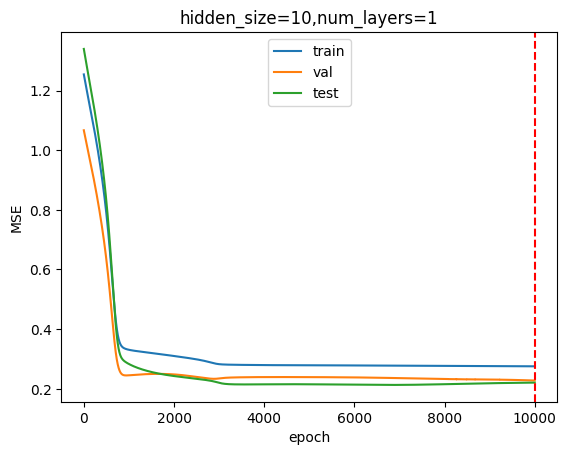

epoch: 0 train loss: 1.0419256687164307, validation loss: 0.8724167943000793
epoch: 500 train loss: 0.3206086754798889, validation loss: 0.2515689730644226
epoch: 1000 train loss: 0.30656272172927856, validation loss: 0.2482919692993164
epoch: 1500 train loss: 0.2907746732234955, validation loss: 0.23513546586036682
epoch: 2000 train loss: 0.2823232412338257, validation loss: 0.2352723479270935
epoch: 2500 train loss: 0.2813490331172943, validation loss: 0.2365737110376358
epoch: 3000 train loss: 0.2802429497241974, validation loss: 0.23728391528129578
epoch: 3500 train loss: 0.2789647579193115, validation loss: 0.237819105386734
epoch: 4000 train loss: 0.2778680920600891, validation loss: 0.23703277111053467
epoch: 4500 train loss: 0.27716413140296936, validation loss: 0.2343374341726303
epoch: 5000 train loss: 0.2768126428127289, validation loss: 0.23198090493679047
epoch: 5500 train loss: 0.2764509916305542, validation loss: 0.2302064746618271
epoch: 6000 train loss: 0.2759366929531

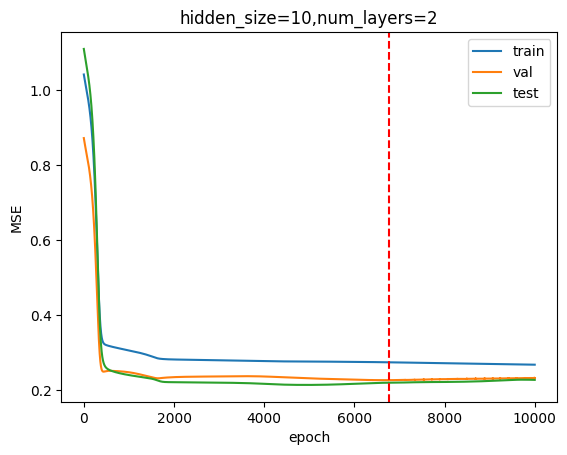

epoch: 0 train loss: 1.41834557056427, validation loss: 1.170483112335205
epoch: 500 train loss: 0.36293870210647583, validation loss: 0.30466756224632263
epoch: 1000 train loss: 0.32342079281806946, validation loss: 0.2787790596485138
epoch: 1500 train loss: 0.3111550211906433, validation loss: 0.2627232074737549
epoch: 2000 train loss: 0.30602461099624634, validation loss: 0.25504106283187866
epoch: 2500 train loss: 0.30219483375549316, validation loss: 0.2503160834312439
epoch: 3000 train loss: 0.2945813834667206, validation loss: 0.24414527416229248
epoch: 3500 train loss: 0.2824951112270355, validation loss: 0.23366433382034302
epoch: 4000 train loss: 0.2774263620376587, validation loss: 0.23120224475860596
epoch: 4500 train loss: 0.2769588828086853, validation loss: 0.23174864053726196
epoch: 5000 train loss: 0.27674397826194763, validation loss: 0.23214523494243622
epoch: 5500 train loss: 0.27663344144821167, validation loss: 0.23240108788013458
epoch: 6000 train loss: 0.2765625

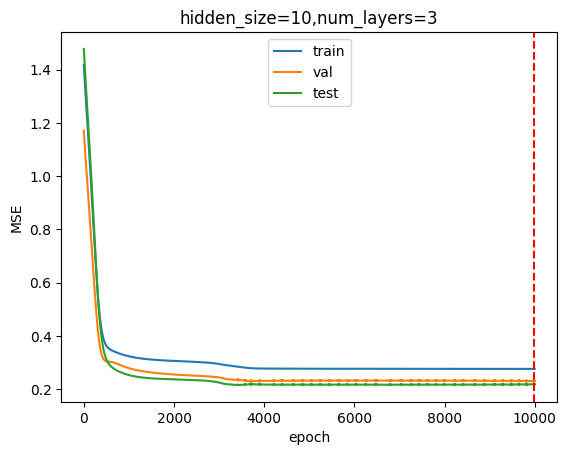

epoch: 0 train loss: 1.0556708574295044, validation loss: 0.8944721817970276
epoch: 500 train loss: 0.3134665787220001, validation loss: 0.24625274538993835
epoch: 1000 train loss: 0.3017057180404663, validation loss: 0.2511342167854309
epoch: 1500 train loss: 0.297498881816864, validation loss: 0.2499547153711319
epoch: 2000 train loss: 0.2888590693473816, validation loss: 0.2395954579114914
epoch: 2500 train loss: 0.27877363562583923, validation loss: 0.23704294860363007
epoch: 3000 train loss: 0.2781086564064026, validation loss: 0.2358507663011551
epoch: 3500 train loss: 0.277764230966568, validation loss: 0.2351868748664856
epoch: 4000 train loss: 0.2773393392562866, validation loss: 0.23362484574317932
epoch: 4500 train loss: 0.27685242891311646, validation loss: 0.23139092326164246
epoch: 5000 train loss: 0.2762046754360199, validation loss: 0.22918079793453217
epoch: 5500 train loss: 0.275058776140213, validation loss: 0.22616451978683472
epoch: 6000 train loss: 0.2740935087203

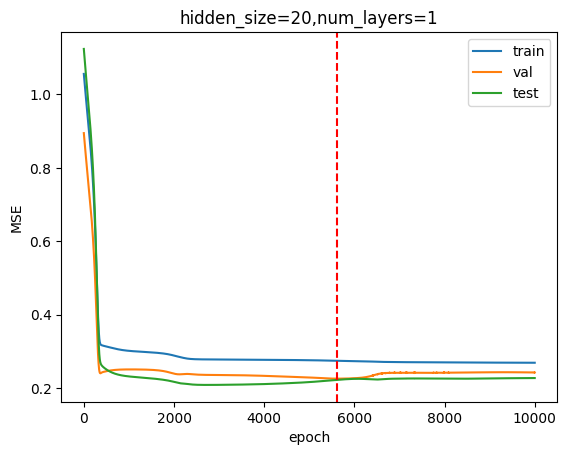

epoch: 0 train loss: 1.0604248046875, validation loss: 0.9069130420684814
epoch: 500 train loss: 0.314677357673645, validation loss: 0.24445851147174835
epoch: 1000 train loss: 0.2892448902130127, validation loss: 0.23846785724163055
epoch: 1500 train loss: 0.27773517370224, validation loss: 0.2393225133419037
epoch: 2000 train loss: 0.27712202072143555, validation loss: 0.23801125586032867
epoch: 2500 train loss: 0.27665233612060547, validation loss: 0.23632875084877014
epoch: 3000 train loss: 0.2760491967201233, validation loss: 0.2343740314245224
epoch: 3500 train loss: 0.2751738429069519, validation loss: 0.2309160828590393
epoch: 4000 train loss: 0.27464327216148376, validation loss: 0.23047120869159698
epoch: 4500 train loss: 0.2738623321056366, validation loss: 0.2308386266231537
epoch: 5000 train loss: 0.270913690328598, validation loss: 0.2396172285079956
epoch: 5500 train loss: 0.27031493186950684, validation loss: 0.24065031111240387
epoch: 6000 train loss: 0.270094126462936

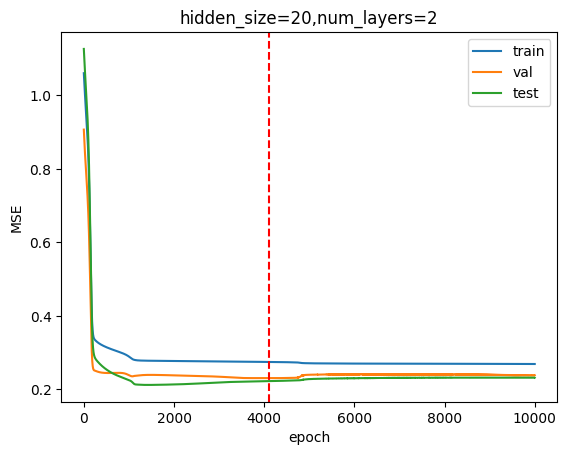

epoch: 0 train loss: 1.0375351905822754, validation loss: 0.8384128212928772
epoch: 500 train loss: 0.2907450199127197, validation loss: 0.24131448566913605
epoch: 1000 train loss: 0.2789708077907562, validation loss: 0.24033038318157196
epoch: 1500 train loss: 0.27859261631965637, validation loss: 0.23998914659023285
epoch: 2000 train loss: 0.2781589925289154, validation loss: 0.2396019995212555
epoch: 2500 train loss: 0.2775910794734955, validation loss: 0.23896744847297668
epoch: 3000 train loss: 0.2768128216266632, validation loss: 0.23760837316513062
epoch: 3500 train loss: 0.2760855257511139, validation loss: 0.23474985361099243
epoch: 4000 train loss: 0.27493318915367126, validation loss: 0.22902332246303558
epoch: 4500 train loss: 0.27315717935562134, validation loss: 0.2299255132675171
epoch: 5000 train loss: 0.27188417315483093, validation loss: 0.23293429613113403
epoch: 5500 train loss: 0.27056604623794556, validation loss: 0.23657947778701782
epoch: 6000 train loss: 0.2693

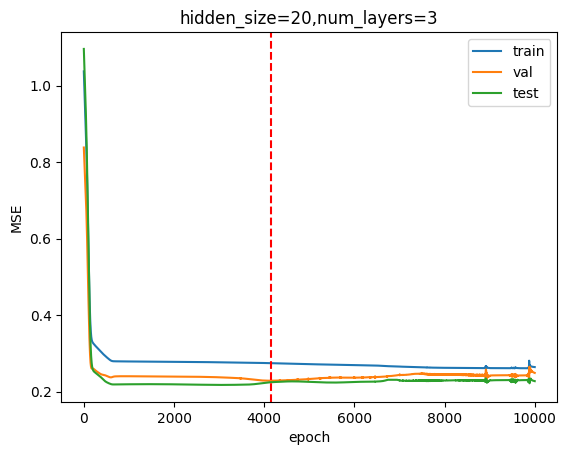

epoch: 0 train loss: 1.0733715295791626, validation loss: 0.8902839422225952
epoch: 500 train loss: 0.2960037291049957, validation loss: 0.24087555706501007
epoch: 1000 train loss: 0.28062722086906433, validation loss: 0.23190940916538239
epoch: 1500 train loss: 0.27861905097961426, validation loss: 0.23550626635551453
epoch: 2000 train loss: 0.2777559757232666, validation loss: 0.23398877680301666
epoch: 2500 train loss: 0.2771722674369812, validation loss: 0.23363010585308075
epoch: 3000 train loss: 0.27664023637771606, validation loss: 0.23376993834972382
epoch: 3500 train loss: 0.2756779193878174, validation loss: 0.23399761319160461
epoch: 4000 train loss: 0.2751155495643616, validation loss: 0.23289009928703308
epoch: 4500 train loss: 0.2733379602432251, validation loss: 0.23819728195667267
epoch: 5000 train loss: 0.27188923954963684, validation loss: 0.2379438877105713
epoch: 5500 train loss: 0.27121567726135254, validation loss: 0.2386096566915512
epoch: 6000 train loss: 0.2708

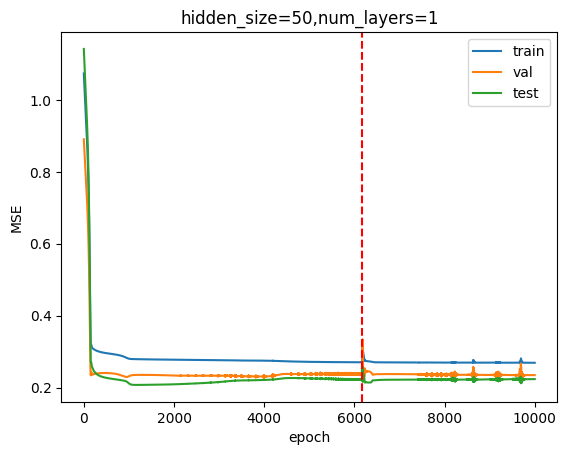

epoch: 0 train loss: 1.036324381828308, validation loss: 0.8458348512649536
epoch: 500 train loss: 0.2874641418457031, validation loss: 0.23396442830562592
epoch: 1000 train loss: 0.27781638503074646, validation loss: 0.2368173450231552
epoch: 1500 train loss: 0.27639052271842957, validation loss: 0.2339964359998703
epoch: 2000 train loss: 0.2746971547603607, validation loss: 0.23688936233520508
epoch: 2500 train loss: 0.27414393424987793, validation loss: 0.23827840387821198
epoch: 3000 train loss: 0.2735774517059326, validation loss: 0.24267663061618805
epoch: 3500 train loss: 0.2731829285621643, validation loss: 0.24544690549373627
epoch: 4000 train loss: 0.27240729331970215, validation loss: 0.24885967373847961
epoch: 4500 train loss: 0.2712259292602539, validation loss: 0.2464800626039505
epoch: 5000 train loss: 0.2722533643245697, validation loss: 0.24041123688220978
epoch: 5500 train loss: 0.27842971682548523, validation loss: 0.23491613566875458
epoch: 6000 train loss: 0.270033

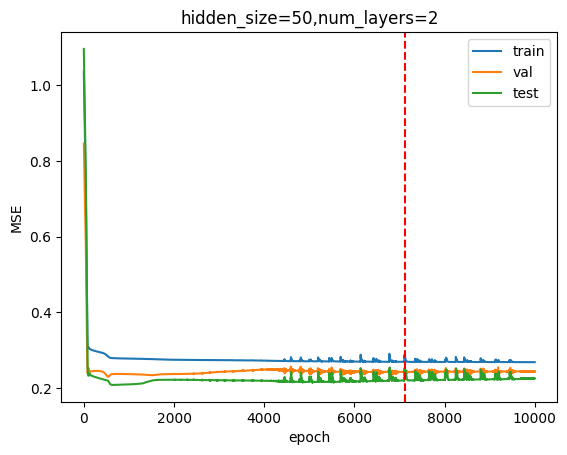

epoch: 0 train loss: 0.9609715342521667, validation loss: 0.793557345867157
epoch: 500 train loss: 0.2792150378227234, validation loss: 0.23272037506103516
epoch: 1000 train loss: 0.27727949619293213, validation loss: 0.23429520428180695
epoch: 1500 train loss: 0.275797963142395, validation loss: 0.2308698445558548
epoch: 2000 train loss: 0.2746739983558655, validation loss: 0.2276691347360611
epoch: 2500 train loss: 0.2724001109600067, validation loss: 0.23105517029762268
epoch: 3000 train loss: 0.26946207880973816, validation loss: 0.24328315258026123
epoch: 3500 train loss: 0.26863253116607666, validation loss: 0.2460135668516159
epoch: 4000 train loss: 0.26842519640922546, validation loss: 0.2456057071685791
epoch: 4500 train loss: 0.26882219314575195, validation loss: 0.24547486007213593
epoch: 5000 train loss: 0.26815372705459595, validation loss: 0.2450675219297409
epoch: 5500 train loss: 0.2680564820766449, validation loss: 0.24540947377681732
epoch: 6000 train loss: 0.26861956

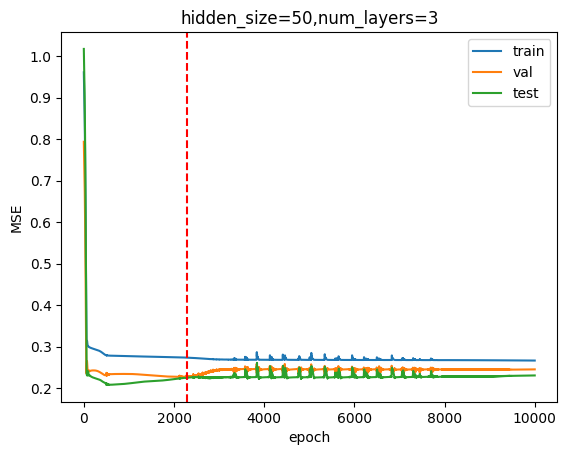

epoch: 0 train loss: 1.112527847290039, validation loss: 0.9435279369354248
epoch: 500 train loss: 0.2879304885864258, validation loss: 0.23407915234565735
epoch: 1000 train loss: 0.27878791093826294, validation loss: 0.23479144275188446
epoch: 1500 train loss: 0.2781308591365814, validation loss: 0.23374314606189728
epoch: 2000 train loss: 0.27754366397857666, validation loss: 0.23167289793491364
epoch: 2500 train loss: 0.27701279520988464, validation loss: 0.2314775288105011
epoch: 3000 train loss: 0.2749575078487396, validation loss: 0.2287895232439041
epoch: 3500 train loss: 0.2723662853240967, validation loss: 0.2387388050556183
epoch: 4000 train loss: 0.27009397745132446, validation loss: 0.24135763943195343
epoch: 4500 train loss: 0.26926249265670776, validation loss: 0.2444646805524826
epoch: 5000 train loss: 0.26841339468955994, validation loss: 0.24433287978172302
epoch: 5500 train loss: 0.26716548204421997, validation loss: 0.24675758183002472
epoch: 6000 train loss: 0.26654

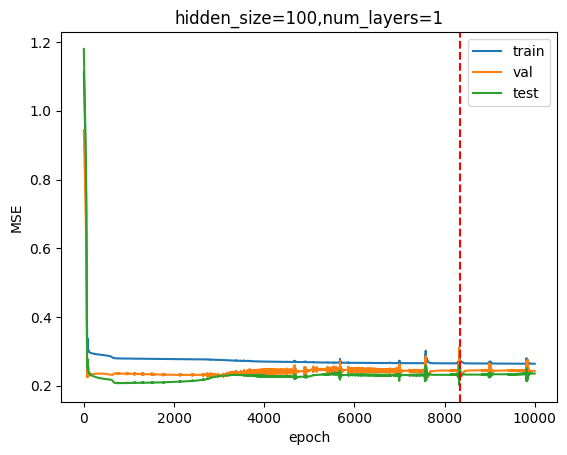

epoch: 0 train loss: 1.005487322807312, validation loss: 0.824722409248352
epoch: 500 train loss: 0.27753347158432007, validation loss: 0.22752486169338226
epoch: 1000 train loss: 0.2756607234477997, validation loss: 0.22866837680339813
epoch: 1500 train loss: 0.2751997113227844, validation loss: 0.2318522036075592
epoch: 2000 train loss: 0.27497556805610657, validation loss: 0.23172350227832794
epoch: 2500 train loss: 0.27470073103904724, validation loss: 0.23160821199417114
epoch: 3000 train loss: 0.27407950162887573, validation loss: 0.23124799132347107
epoch: 3500 train loss: 0.2690448462963104, validation loss: 0.23517689108848572
epoch: 4000 train loss: 0.265910267829895, validation loss: 0.24101102352142334
epoch: 4500 train loss: 0.2652498781681061, validation loss: 0.24274776875972748
epoch: 5000 train loss: 0.26475074887275696, validation loss: 0.24574442207813263
epoch: 5500 train loss: 0.2639068067073822, validation loss: 0.2485945224761963
epoch: 6000 train loss: 0.2628697

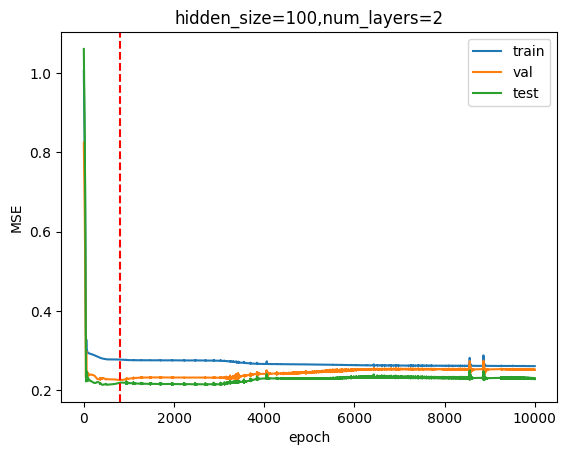

epoch: 0 train loss: 1.009181261062622, validation loss: 0.8275713324546814
epoch: 500 train loss: 0.27897053956985474, validation loss: 0.23036901652812958
epoch: 1000 train loss: 0.27627813816070557, validation loss: 0.22974970936775208
epoch: 1500 train loss: 0.27385807037353516, validation loss: 0.23300570249557495
epoch: 2000 train loss: 0.27275457978248596, validation loss: 0.23138874769210815
epoch: 2500 train loss: 0.27029162645339966, validation loss: 0.23290567100048065
epoch: 3000 train loss: 0.26884910464286804, validation loss: 0.23580218851566315
epoch: 3500 train loss: 0.26673829555511475, validation loss: 0.22907190024852753
epoch: 4000 train loss: 0.26590871810913086, validation loss: 0.2378534972667694
epoch: 4500 train loss: 0.2653483748435974, validation loss: 0.2356710284948349
epoch: 5000 train loss: 0.26492050290107727, validation loss: 0.23624886572360992
epoch: 5500 train loss: 0.26453697681427, validation loss: 0.23793882131576538
epoch: 6000 train loss: 0.263

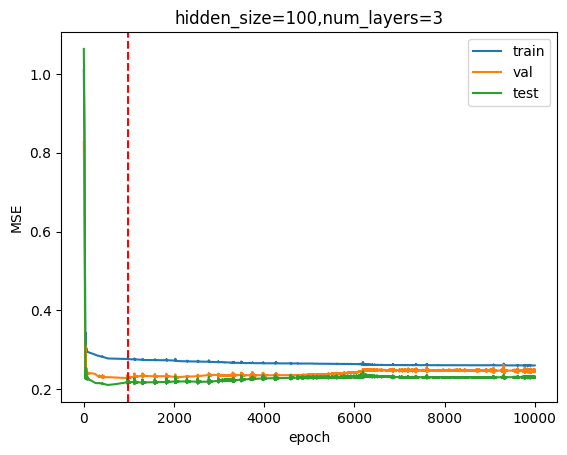

epoch: 0 train loss: 1.0063583850860596, validation loss: 0.8294764161109924
epoch: 500 train loss: 0.2845272421836853, validation loss: 0.2298537641763687
epoch: 1000 train loss: 0.27853164076805115, validation loss: 0.23094555735588074
epoch: 1500 train loss: 0.2780543267726898, validation loss: 0.23204463720321655
epoch: 2000 train loss: 0.277331680059433, validation loss: 0.2288299798965454
epoch: 2500 train loss: 0.27572551369667053, validation loss: 0.23774898052215576
epoch: 3000 train loss: 0.2749837040901184, validation loss: 0.237203449010849
epoch: 3500 train loss: 0.27083820104599, validation loss: 0.22340604662895203
epoch: 4000 train loss: 0.2685326933860779, validation loss: 0.2369917929172516
epoch: 4500 train loss: 0.26786524057388306, validation loss: 0.23721373081207275
epoch: 5000 train loss: 0.26728758215904236, validation loss: 0.23860660195350647
epoch: 5500 train loss: 0.2668443024158478, validation loss: 0.24305030703544617
epoch: 6000 train loss: 0.27153033018

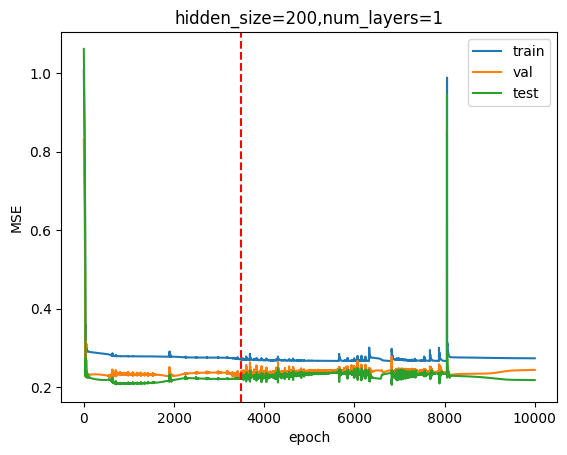

epoch: 0 train loss: 1.0657964944839478, validation loss: 0.8633749485015869
epoch: 500 train loss: 0.27768674492836, validation loss: 0.2293107658624649
epoch: 1000 train loss: 0.27560368180274963, validation loss: 0.2297482043504715
epoch: 1500 train loss: 0.27519020438194275, validation loss: 0.23211179673671722
epoch: 2000 train loss: 0.2749912440776825, validation loss: 0.23204386234283447
epoch: 2500 train loss: 0.2747286856174469, validation loss: 0.23237501084804535
epoch: 3000 train loss: 0.26994165778160095, validation loss: 0.23804931342601776
epoch: 3500 train loss: 0.26530855894088745, validation loss: 0.24126383662223816
epoch: 4000 train loss: 0.2623651325702667, validation loss: 0.24849702417850494
epoch: 4500 train loss: 0.2607271671295166, validation loss: 0.2503417432308197
epoch: 5000 train loss: 0.2582058608531952, validation loss: 0.24531437456607819
epoch: 5500 train loss: 0.2627258598804474, validation loss: 0.2399347424507141
epoch: 6000 train loss: 0.255116999

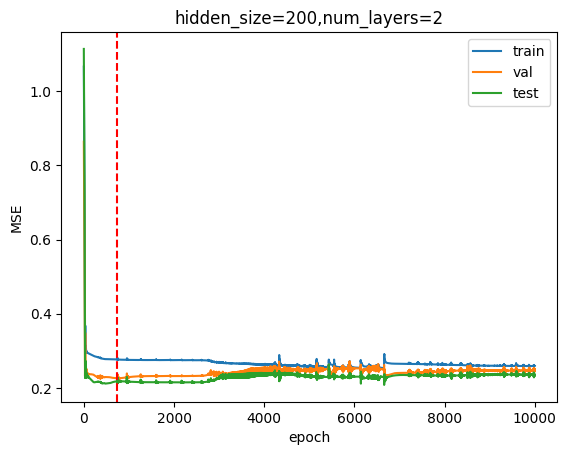

epoch: 0 train loss: 1.0397683382034302, validation loss: 0.8460391163825989
epoch: 500 train loss: 0.2816058397293091, validation loss: 0.23686276376247406
epoch: 1000 train loss: 0.27770349383354187, validation loss: 0.23179037868976593
epoch: 1500 train loss: 0.2764836251735687, validation loss: 0.23382988572120667
epoch: 2000 train loss: 0.2742823660373688, validation loss: 0.23028595745563507
epoch: 2500 train loss: 0.2698374092578888, validation loss: 0.23795540630817413
epoch: 3000 train loss: 0.26839345693588257, validation loss: 0.23751191794872284
epoch: 3500 train loss: 0.2675304114818573, validation loss: 0.2359773814678192
epoch: 4000 train loss: 0.26527464389801025, validation loss: 0.2405395805835724
epoch: 4500 train loss: 0.261005163192749, validation loss: 0.249659925699234
epoch: 5000 train loss: 0.2595330774784088, validation loss: 0.24749772250652313
epoch: 5500 train loss: 0.2608892023563385, validation loss: 0.24757888913154602
epoch: 6000 train loss: 0.257005989

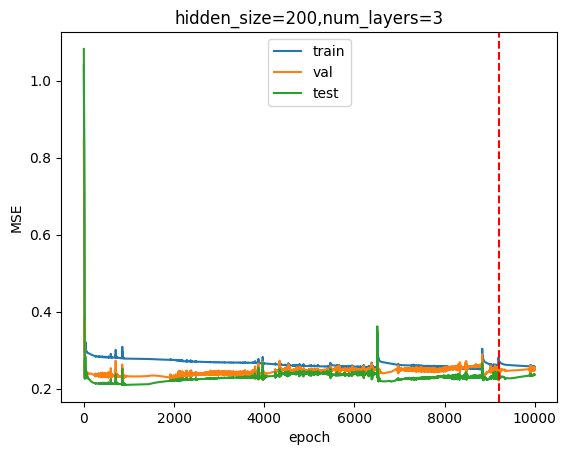

epoch: 0 train loss: 1.0026496648788452, validation loss: 0.816861629486084
epoch: 500 train loss: 0.2833728790283203, validation loss: 0.23062078654766083
epoch: 1000 train loss: 0.2800111770629883, validation loss: 0.23351368308067322
epoch: 1500 train loss: 0.27896586060523987, validation loss: 0.23338279128074646
epoch: 2000 train loss: 0.2780316472053528, validation loss: 0.22920899093151093
epoch: 2500 train loss: 0.27741706371307373, validation loss: 0.22942467033863068
epoch: 3000 train loss: 0.2771330177783966, validation loss: 0.23134078085422516
epoch: 3500 train loss: 0.27740082144737244, validation loss: 0.23620988428592682
epoch: 4000 train loss: 0.2698429524898529, validation loss: 0.23637168109416962
epoch: 4500 train loss: 0.2682764530181885, validation loss: 0.23272930085659027
epoch: 5000 train loss: 0.26656004786491394, validation loss: 0.2462673783302307
epoch: 5500 train loss: 0.26607781648635864, validation loss: 0.23497548699378967
epoch: 6000 train loss: 0.2652

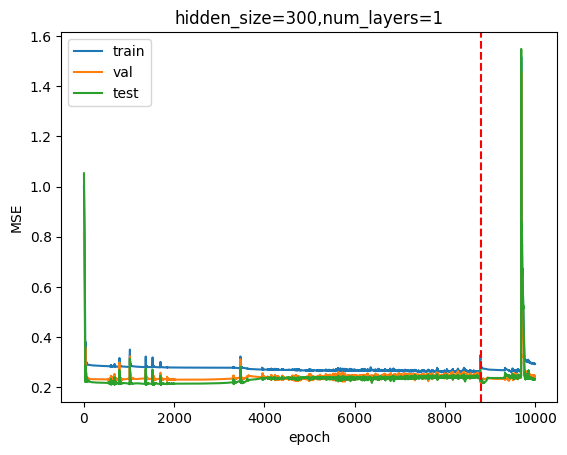

epoch: 0 train loss: 1.053079605102539, validation loss: 0.8471726179122925
epoch: 500 train loss: 0.2774178683757782, validation loss: 0.2246861606836319
epoch: 1000 train loss: 0.2767921984195709, validation loss: 0.2261034995317459
epoch: 1500 train loss: 0.2771149277687073, validation loss: 0.23045778274536133
epoch: 2000 train loss: 0.2763095796108246, validation loss: 0.2282506376504898
epoch: 2500 train loss: 0.2757658064365387, validation loss: 0.23109519481658936
epoch: 3000 train loss: 0.27407342195510864, validation loss: 0.2356908619403839
epoch: 3500 train loss: 0.2729463577270508, validation loss: 0.24156729876995087
epoch: 4000 train loss: 0.2668101191520691, validation loss: 0.24732449650764465
epoch: 4500 train loss: 0.2658367455005646, validation loss: 0.24706877768039703
epoch: 5000 train loss: 0.26725178956985474, validation loss: 0.2437928318977356
epoch: 5500 train loss: 0.263965904712677, validation loss: 0.24737639725208282
epoch: 6000 train loss: 0.261632502079

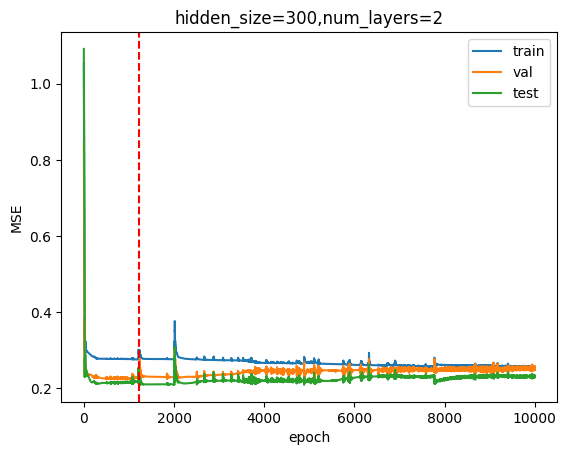

epoch: 0 train loss: 1.001394271850586, validation loss: 0.7991287112236023


KeyboardInterrupt: 

In [ ]:
hidden_size_list = [10, 20, 50, 100, 200, 300]
num_layers_list = [1, 2, 3]
ind = 0
for hidden_size in hidden_size_list:
  for num_layers in num_layers_list:
    main(hidden_size, num_layers, ind)
    ind += 1